# Model Training

In this notebook, we will ask you a series of questions regarding model selection. Based on your responses, we will ask you to create the ML models that you've chosen. 

The bonus step is completely optional, but if you provide a sufficient third machine learning model in this project, we will add `1000` points to your Kahoot leaderboard score.

**Note**: Use the dataset that you've created in your previous data transformation step (not the original model).

## Questions
Is this a classification or regression task?  

This is a classification task. We are determining whether transactions are fraudulent or not.

Are you predicting for multiple classes or binary classes?  

We are predicting for binary classes of Fraud and Not Fraud.

Given these observations, which 2 (or possibly 3) machine learning models will you choose?  

Random Forest
kNN
Decision Trees

## First Model

Using the first model that you've chosen, implement the following steps.

### 1) Create a train-test split

Use your cleaned and transformed dataset to divide your features and labels into training and testing sets. Make sure you’re only using numeric or properly encoded features.  

In [30]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix, classification_report

from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV

import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
import pandas as pd 
import numpy as np

new_transactions = pd.read_csv("new_hot_dataframe.csv")
new_transactions.head()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,983.09,36730.24,35747.15,0.00,0.00,0,0.0,0.0,0.0,1.0,0.0
1,55215.25,99414.00,44198.75,0.00,0.00,0,0.0,0.0,0.0,1.0,0.0
2,220986.01,7773074.97,7994060.98,924031.48,703045.48,0,1.0,0.0,0.0,0.0,0.0
3,2357394.75,0.00,0.00,4202580.45,6559975.19,0,0.0,0.0,0.0,0.0,1.0
4,67990.14,0.00,0.00,625317.04,693307.19,0,0.0,1.0,0.0,0.0,0.0


In [32]:
# TODO: load the new Transactions dataset
new_transactions = pd.read_csv("new_hot_dataframe.csv")

# TODO: select predictors & target variables
X = new_transactions[["oldbalanceOrg", "newbalanceOrig"]]
y = new_transactions["isFraud"]

# TODO: perform a train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [34]:
# let's generate a classification report to see how well our random forest performed
yhat = rf.predict(X_test) 

confusion = confusion_matrix(y_test, yhat)
class_report = classification_report(y_test, yhat)

print("Confusion Matrix \n", confusion)
print("\nClassification Report\n", class_report)

Confusion Matrix 
 [[199583    160]
 [   129    128]]

Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    199743
           1       0.44      0.50      0.47       257

    accuracy                           1.00    200000
   macro avg       0.72      0.75      0.73    200000
weighted avg       1.00      1.00      1.00    200000



### 2) Search for best hyperparameters
Use tools like GridSearchCV, RandomizedSearchCV, or model-specific tuning functions to find the best hyperparameters for your first model.

In [35]:
# TODO: implement random search on the RandomForestClassifier model to find best hyperparams
# DOCS: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
param_dist = {
    "criterion": ["gini", "entropy", "log_loss"],
    "max_depth": range(5, 20),
    "max_features": ["sqrt", "log2"]
}

# TODO: set up RandomizedSearchCV with 5-fold cross-validation
rf = RandomForestClassifier()
random_search = RandomizedSearchCV(rf, param_distributions= param_dist, n_iter=20, random_state= 42, cv= 5, n_jobs=-1)

# TODO: fit this model on your training data
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': range(5, 20),
                                        'max_features': ['sqrt', 'log2']},
                   random_state=42)

### 3) Train your model
Select the model with best hyperparameters and generate predictions on your test set. Evaluate your models accuracy, precision, recall, and sensitivity.  

In [36]:
# TODO: extract the best rf estimator
rf_best = random_search.best_estimator_

# TODO: use this estimator to generate "yhat" on your X_test dataset
yhat = rf_best.predict(X_test)

# TODO: generate a confusion matrix and a classification report
confusion = confusion_matrix(y_test, yhat)
class_report = classification_report(y_test, yhat)

print("Confusion Matrix \n", confusion)
print("\nClassification Report\n", class_report)

Confusion Matrix 
 [[199724     19]
 [   157    100]]

Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    199743
           1       0.84      0.39      0.53       257

    accuracy                           1.00    200000
   macro avg       0.92      0.69      0.77    200000
weighted avg       1.00      1.00      1.00    200000



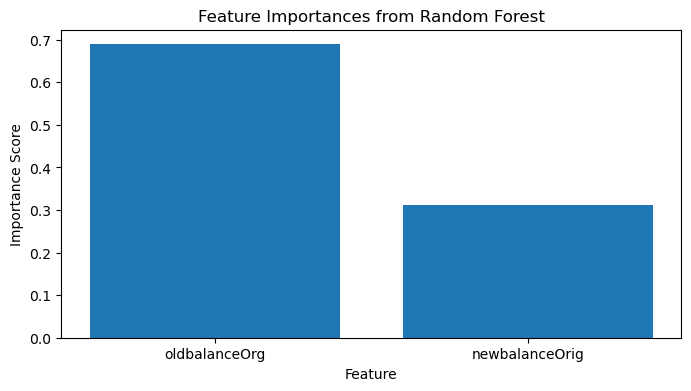

In [37]:
# extract feature importances from the trained RandomForest model
importances = rf_best.feature_importances_
feature_names = X.columns

# Create a bar plot to visualize feature importances
plt.figure(figsize=(8, 4))
plt.bar(feature_names, importances)
plt.title('Feature Importances from Random Forest')
plt.xlabel('Feature')
plt.ylabel('Importance Score')
plt.show()

## Second Model

Create a second machine learning object and rerun steps (2) & (3) on this model. Compare accuracy metrics between these two models. Which handles the class imbalance more effectively?

Create as many code-blocks as needed.

In [40]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score

from sklearn.model_selection import train_test_split, GridSearchCV

# create a toy dataset with 15 samples (5 per class)
data = pd.read_csv("new_hot_dataframe.csv")

# convert to DataFrame
df = pd.DataFrame(data)
df.head()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,983.09,36730.24,35747.15,0.00,0.00,0,0.0,0.0,0.0,1.0,0.0
1,55215.25,99414.00,44198.75,0.00,0.00,0,0.0,0.0,0.0,1.0,0.0
2,220986.01,7773074.97,7994060.98,924031.48,703045.48,0,1.0,0.0,0.0,0.0,0.0
3,2357394.75,0.00,0.00,4202580.45,6559975.19,0,0.0,0.0,0.0,0.0,1.0
4,67990.14,0.00,0.00,625317.04,693307.19,0,0.0,1.0,0.0,0.0,0.0


In [41]:
# TODO: select your predictors & target
X = new_transactions.drop(columns=["isFraud"])

# TODO: the dataset into training and testing sets
y = new_transactions["isFraud"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [42]:
#Here i will sample 30% of each set to speed things up.
X_train_sample = X_train.sample(frac=0.3, random_state=42)
y_train_sample = y_train.loc[X_train_sample.index]

X_test_sample = X_test.sample(frac=0.3, random_state=42)
y_test_sample = y_test.loc[X_test_sample.index]

In [43]:
# create a basic knn model with 3 neighbors
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

yhat = knn.predict(X_test)
accuracy = accuracy_score(y_test, yhat)
print("Testing accuracy on full stratified data:", accuracy)


Testing accuracy on full stratified data: 0.9993333333333333


In [59]:
k_values = range(1, 30)
train_accuracies = []
test_accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_sample, y_train_sample)

    train_pred = knn.predict(X_train_sample)
    test_pred = knn.predict(X_test_sample)

    train_accuracies.append(accuracy_score(y_train_sample, train_pred))
    test_accuracies.append(accuracy_score(y_test_sample, test_pred))

print("Average training accuracy (sampled):", sum(train_accuracies) / len(train_accuracies))
print("Average testing accuracy (sampled):", sum(test_accuracies) / len(test_accuracies))


Average training accuracy (sampled): 0.9993146141215107
Average testing accuracy (sampled): 0.9991233716475096


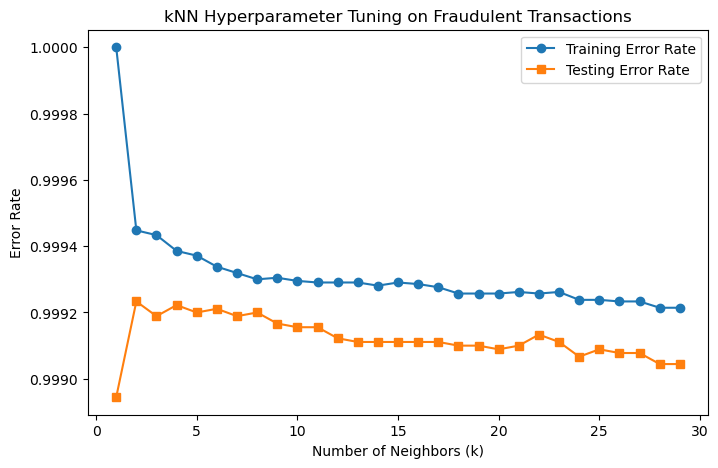

Best k for test accuracy: 1


In [60]:
# Plot the performance for each k
plt.figure(figsize=(8, 5))
plt.plot(k_values, train_accuracies, marker='o', label="Training Error Rate")
plt.plot(k_values, test_accuracies, marker='s', label="Testing Error Rate")

plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Error Rate")
plt.title("kNN Hyperparameter Tuning on Fraudulent Transactions")
plt.legend()
plt.show()

# Determine best k based on highest test accuracy
best_k = k_values[test_accuracies.index(min(test_accuracies))]
print("Best k for test accuracy:", best_k)

### (Bonus/Optional) Third Model

Create a third machine learning model and rerun steps (2) & (3) on this model. Which model has the best predictive capabilities? 

Create as many code-blocks as needed.

In [46]:
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV

# TODO: select predictors & target variables
X = new_transactions[["amount", "oldbalanceOrg", "newbalanceOrig", "oldbalanceDest", "newbalanceDest"]]
y = new_transactions["isFraud"]

X_encoded = pd.get_dummies(X, drop_first = True)

X_encoded.head()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,983.09,36730.24,35747.15,0.00,0.00
1,55215.25,99414.00,44198.75,0.00,0.00
2,220986.01,7773074.97,7994060.98,924031.48,703045.48
3,2357394.75,0.00,0.00,4202580.45,6559975.19
4,67990.14,0.00,0.00,625317.04,693307.19


In [47]:
# TODO: perform a train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
from sklearn.tree import DecisionTreeClassifier

# instantiate the DecisionTreeClassifier with a maximum depth of 3 and a fixed random state for reproducibility
dt = DecisionTreeClassifier(max_depth=3, random_state=42)

# Fit the classifier to the data
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [49]:
from sklearn.tree import export_text

# Export the tree structure as text
tree_rules = export_text(dt, feature_names=X_train.columns)
print('Decision tree structure:')
print(tree_rules)

Decision tree structure:
|--- amount <= 1720551.62
|   |--- amount <= 0.01
|   |   |--- class: 1
|   |--- amount >  0.01
|   |   |--- amount <= 723776.06
|   |   |   |--- class: 0
|   |   |--- amount >  723776.06
|   |   |   |--- class: 0
|--- amount >  1720551.62
|   |--- oldbalanceOrg <= 1699871.00
|   |   |--- class: 0
|   |--- oldbalanceOrg >  1699871.00
|   |   |--- newbalanceOrig <= 24374.15
|   |   |   |--- class: 1
|   |   |--- newbalanceOrig >  24374.15
|   |   |   |--- class: 1



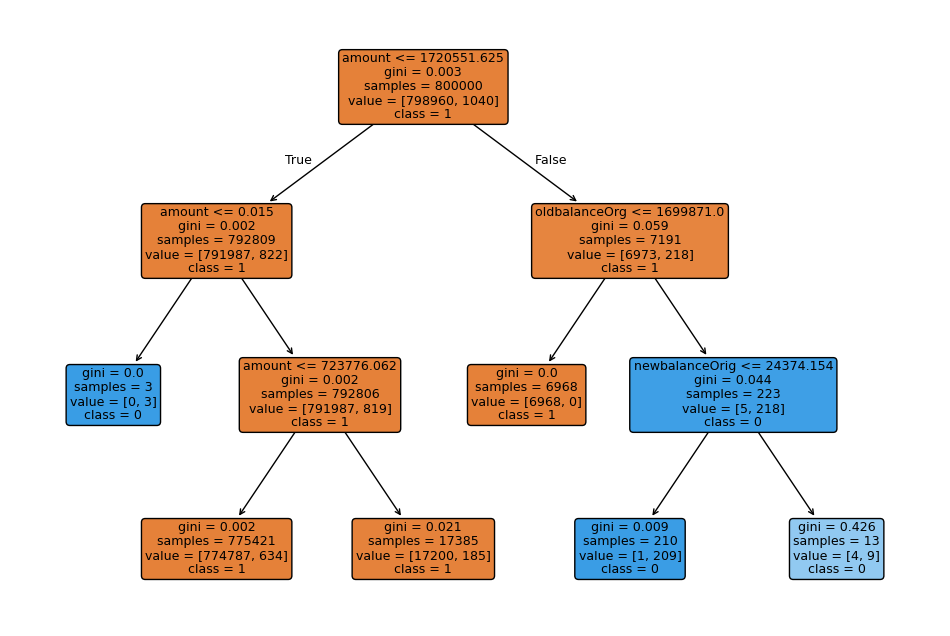

In [50]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
tree.plot_tree(dt, feature_names=X_train.columns, filled=True, class_names=["1", "0"], rounded=True)
plt.show()

In [51]:
yhat = dt.predict(X_test) 

confusion = confusion_matrix(y_test, yhat)
class_report = classification_report(y_test, yhat)

print("Confusion Matrix \n", confusion)
print("\nClassification Report\n", class_report)

Confusion Matrix 
 [[199741      2]
 [   189     68]]

Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    199743
           1       0.97      0.26      0.42       257

    accuracy                           1.00    200000
   macro avg       0.99      0.63      0.71    200000
weighted avg       1.00      1.00      1.00    200000



In [52]:
# TODO: implement random search on the DecisionTree model to find best hyperparams
# DOCS: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier
params = {
    "criterion": ["gini", "entropy", "log_loss"],
    "splitter": ["best", "random"],
    "max_depth": range(1, 50)
}

dt = DecisionTreeClassifier(random_state=42)

# TODO: set up RandomizedSearchCV with 5-fold cross-validation
random_search = RandomizedSearchCV(dt, param_distributions= params, random_state= 42, cv= 5, )

# TODO: fit this model on your training data
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': range(1, 50),
                                        'splitter': ['best', 'random']},
                   random_state=42)

In [53]:
# TODO: implement random search on the DecisionTree model to find best hyperparams
# DOCS: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier
params = {
    "criterion": ["gini", "entropy", "log_loss"],
    "splitter": ["best", "random"],
    "max_depth": range(1, 50)
}

dt = DecisionTreeClassifier(random_state=42)

# TODO: set up RandomizedSearchCV with 5-fold cross-validation
random_search = GridSearchCV(dt, param_grid= params, cv= 5, )

# TODO: fit this model on your training data
random_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': range(1, 50),
                         'splitter': ['best', 'random']})

In [54]:
# extract the best classifier
best_dt = random_search.best_estimator_

yhat = best_dt.predict(X_test) 

confusion = confusion_matrix(y_test, yhat)
class_report = classification_report(y_test, yhat)

print("Confusion Matrix \n", confusion)
print("\nClassification Report\n", class_report)

Confusion Matrix 
 [[199729     14]
 [    76    181]]

Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    199743
           1       0.93      0.70      0.80       257

    accuracy                           1.00    200000
   macro avg       0.96      0.85      0.90    200000
weighted avg       1.00      1.00      1.00    200000



In [55]:
random_search.best_params_

{'criterion': 'gini', 'max_depth': 12, 'splitter': 'best'}

In [56]:
from sklearn.model_selection import cross_val_score

# instantiate 2 DecisionTreeClassifiers for the train set to display variance
dt1 = DecisionTreeClassifier()
dt1.fit(X_train, y_train)

scores1 = cross_val_score(dt1, X_test, y_test, cv=5)
print('Cross-validation scores for first tree:', scores1)

Cross-validation scores for first tree: [0.999275 0.9994   0.9989   0.999225 0.9993  ]


In [57]:
dt2 = DecisionTreeClassifier()
dt2.fit(X_train, y_train)

scores2 = cross_val_score(dt2, X_test, y_test, cv=5)
print('Cross-validation scores for second tree:', scores2)

Cross-validation scores for second tree: [0.9992   0.999425 0.998925 0.999225 0.999325]
